# K-means

### Réduction de dimension


In [1]:
from numba import njit
import time
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [6]:

@njit
def initialize_centers(data, k):
    # Sélectionne k points aléatoires comme centres initiaux
    indices = np.random.choice(len(data), k, replace=False)
    centers = data[indices]
    return centers

@njit
def assign_points(data, centers):
    clusters = []
    for point in data:
        # Trouve l'indice du centre le plus proche pour chaque point
        # distances = np.linalg.norm(centers - point, axis=1)
        # cluster_index = np.argmin(distances)
        # clusters.append(cluster_index)
        distances = np.sqrt(np.sum((centers - point) ** 2, axis=1))
        cluster_index = np.argmin(distances)
        clusters.append(cluster_index)
    return np.array(clusters)

@njit
def update_centers(data, clusters, old_centers):
    # new_centers = []
    # for i in range(len(old_centers)):
    #     # Calcule le nouveau centre comme la moyenne des points du cluster
    #     points = data[clusters == i]
    #     new_center = np.mean(points, axis=0)
    #     new_centers.append(new_center)
    new_centers = np.zeros_like(old_centers)
    counts = np.zeros(len(old_centers))
    for i in range(len(old_centers)):
        points = data[clusters == i]
        counts[i] = len(points)
        new_centers[i] = np.sum(points, axis=0)
    for i in range(len(old_centers)):
        if counts[i] != 0:
            new_centers[i] /= counts[i]
    return new_centers


def kmeans_star(data, k, max_iterations=100):
    # Initialisation des centres initiaux
    centers = initialize_centers(data, k)
    for iteration in range(max_iterations):
        start_time = time.time()
        # Attribution des points aux centres les plus proches
        clusters = assign_points(data, centers)
        # Mise à jour des centres
        new_centers = update_centers(data, clusters, centers)
        if np.all(centers == new_centers):
            break
        centers = new_centers
        end_time = time.time()
        iteration_time = end_time - start_time
        print(f"Iteration {iteration + 1}: {iteration_time} seconds")
    return clusters, centers

n_clusters = 10
data = x_train.reshape(-1, 28*28).astype(float)/255.0

clusters, centers = kmeans_star(data, n_clusters, max_iterations=100)

plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']

# for i in range(n_clusters):
#     cluster_data = data[clusters == i]
#     plt.scatter(cluster_data[:,0], cluster_data[:,1], c=colors[i], label=f'Cluster {i}')


Iteration 1: 3.1840744018554688 seconds
Iteration 2: 0.9134254455566406 seconds
Iteration 3: 0.9140009880065918 seconds
Iteration 4: 0.9070751667022705 seconds
Iteration 5: 0.8734502792358398 seconds
Iteration 6: 0.8900485038757324 seconds
Iteration 7: 0.8784253597259521 seconds
Iteration 8: 0.8865728378295898 seconds
Iteration 9: 0.8930008411407471 seconds
Iteration 10: 0.8694894313812256 seconds
Iteration 11: 0.9025766849517822 seconds
Iteration 12: 0.8924238681793213 seconds
Iteration 13: 0.9205005168914795 seconds
Iteration 14: 0.8579995632171631 seconds
Iteration 15: 0.8895103931427002 seconds
Iteration 16: 0.8774912357330322 seconds
Iteration 17: 0.9159984588623047 seconds
Iteration 18: 0.8889994621276855 seconds
Iteration 19: 0.9340016841888428 seconds
Iteration 20: 0.8784348964691162 seconds
Iteration 21: 0.91656494140625 seconds
Iteration 22: 0.8744266033172607 seconds
Iteration 23: 0.9315657615661621 seconds
Iteration 24: 0.8804168701171875 seconds
Iteration 25: 0.87660408020

<Figure size 576x432 with 0 Axes>

In [7]:
list_reduc = []
for i in data : 
    list_reduc.append(np.linalg.norm(centers - i, axis=1))


In [8]:
print(len(list_reduc))

60000


In [10]:
list_reduc = np.array(list_reduc)

In [11]:
print(list_reduc)

[[8.24966872 7.22811213 8.61414546 ... 7.34486554 8.07121065 6.93340319]
 [8.75953831 7.24752103 5.45766523 ... 8.64800508 9.11318243 8.15176795]
 [8.60158301 8.26028404 9.73355138 ... 8.43637485 8.23364137 8.94015193]
 ...
 [9.24445348 7.41080767 9.12206429 ... 7.38160256 6.99735186 6.75467204]
 [7.63090961 5.98703339 7.97125146 ... 8.13869569 7.73424047 8.29466342]
 [7.69459883 6.74672696 8.70756391 ... 8.21747104 7.78652942 7.00284266]]


C:\Users\Maathess\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


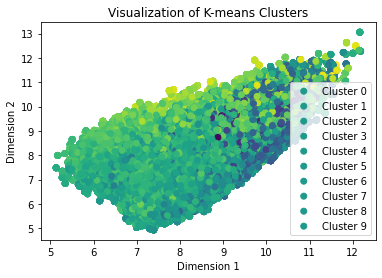

In [12]:
for i in range(n_clusters):
    cluster_points = list_reduc[clusters == i]
    plt.scatter(list_reduc[:, 0], list_reduc[:, 1], c=list_reduc[:,2], label=f'Cluster {i}')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Visualization of K-means Clusters')
plt.legend()
plt.show()


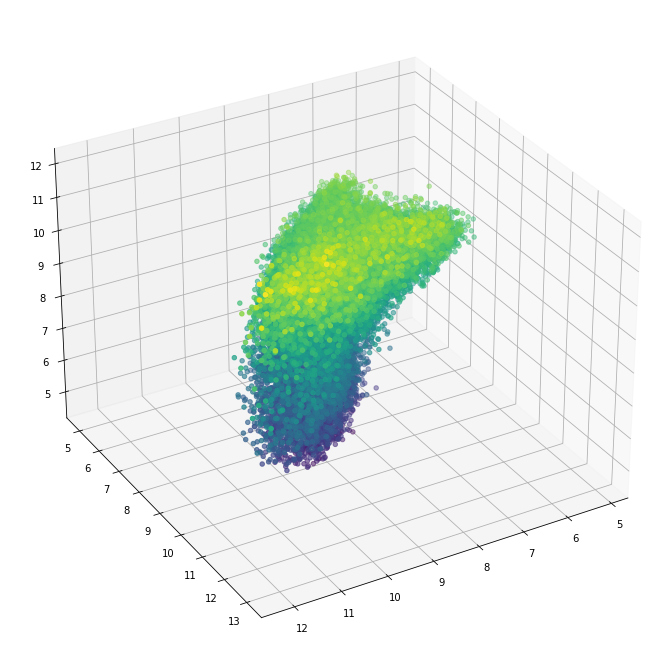

In [13]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.azim = 60
ax.dist = 10
ax.elev = 30
sequence_containing_x_vals = list_reduc[:, 0]
sequence_containing_y_vals = list_reduc[:, 1]
sequence_containing_z_vals = list_reduc[:, 2]


ax.scatter3D(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c=list_reduc[:,2])
plt.show()

## Compression / Décompression

In [42]:
def plot_digits_with_Y(X, Y):
    """
    Afficher les 10 premiers chiffres de chaque chiffre
    """
    fig, axs = plt.subplots(10, 10, figsize=(5, 5))
    for digit in range(10):
        digit_indices = np.where(Y == digit)[0][:10]  # Sélectionner les indices des 10 premiers échantillons du chiffre
        for i, idx in enumerate(digit_indices):
            ax = axs[digit, i]
            ax.imshow(X[idx], cmap='gray')
            ax.axis('off')

NameError: name 'labels' is not defined

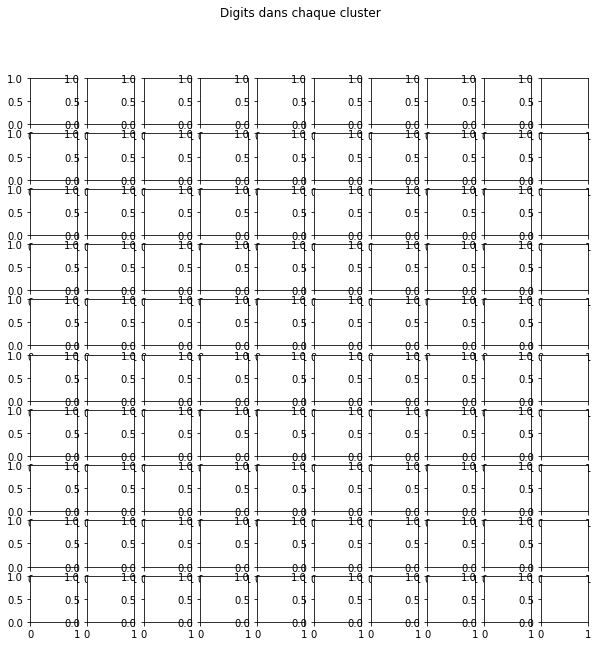

In [15]:
# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, n_clusters))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters):
    cluster_digits = data[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits[j].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.show()

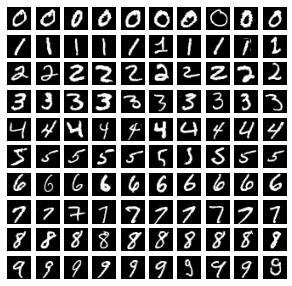

NameError: name 'labels' is not defined

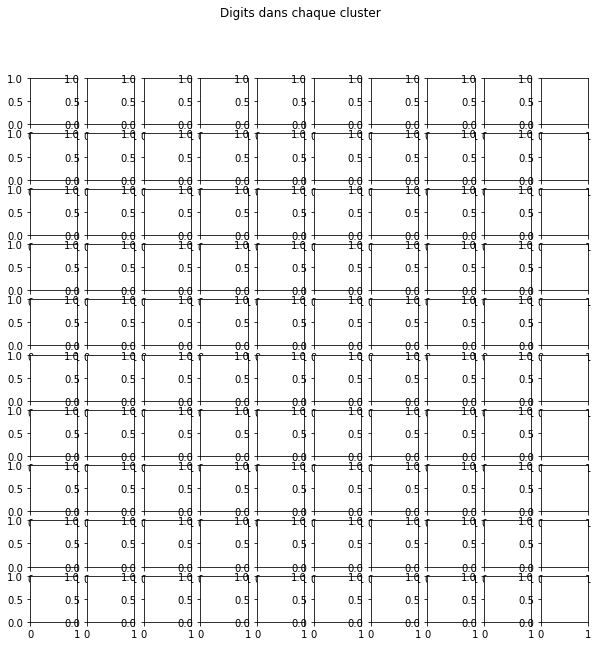

In [41]:
# Afficher les digits pour chaque cluster
fig, axs = plt.subplots(n_clusters, 10, figsize=(10, n_clusters))
fig.suptitle('Digits dans chaque cluster')

for i in range(n_clusters):
    cluster_digits = x_test[labels == i]
    for j in range(10):
        ax = axs[i, j]
        ax.imshow(cluster_digits[j].reshape(28, 28), cmap='gray')
        ax.axis('off')
plt.show()